In [1]:
#buy_computers dataset
#G.THANMAI
#BL.EN.U4CSE21054
#FRIDAY (22/09/23)

In [2]:
import numpy as np
import pandas as pd
df = pd.read_excel("lab04.xlsx")
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'])
df['income'] = label_encoder.fit_transform(df['income'])
df['student'] = label_encoder.fit_transform(df['student'])
df['credit_rating'] = label_encoder.fit_transform(df['credit_rating'])
df['buys_computer'] = label_encoder.fit_transform(df['buys_computer'])
print(df)

    age  income  student  credit_rating  buys_computer
0     1       0        0              1              0
1     1       0        0              0              0
2     0       0        0              1              1
3     2       2        0              1              1
4     2       1        1              1              1
5     2       1        1              0              0
6     0       1        1              0              1
7     1       2        0              1              0
8     1       1        1              1              1
9     2       2        1              1              1
10    1       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    2       2        0              0              0


In [4]:
val = df['age'].value_counts(normalize=True)
val

1    0.357143
2    0.357143
0    0.285714
Name: age, dtype: float64

In [5]:
#ENTROPY FOR EACH FEATURE
from math import log2
def entropy(df,attribute):
    val = df[attribute].value_counts(normalize=True)
    return -sum(p * log2(p) for p in val)

attributes = df.columns

entropy_values = {}
for a in attributes:
    entropy_val = entropy(df, a)
    entropy_values[a] = entropy_val
    
print(entropy_values)

{'age': 1.5774062828523454, 'income': 1.5566567074628228, 'student': 1.0, 'credit_rating': 0.9852281360342516, 'buys_computer': 0.9402859586706311}


In [6]:
#INFORMATION GAIN FOR EACH FEATURE
def information_gain(df, feature, target_attribute):
    total_entropy = entropy(df, target_attribute)
    values = df[feature].unique()
    weighted_entropy = 0
    
    for value in values:
        subset = df[df[feature] == value]
        weighted_entropy += (len(subset) / len(df)) * entropy(subset, target_attribute)
    
    return total_entropy - weighted_entropy

target_attribute = 'buys_computer'
features = df.columns[:-1]

information_gains = {}

for feature in features:
    information_gains[feature] = information_gain(df, feature, target_attribute)

In [7]:
root_node = max(information_gains, key=information_gains.get)

print("Information Gains:")
for feature, gain in information_gains.items():
    print(f"{feature}: {gain:.4f}")

print(f"The first feature for constructing the decision tree (root node) is: {root_node}")

Information Gains:
age: 0.2467
income: 0.0292
student: 0.1518
credit_rating: 0.0481
The first feature for constructing the decision tree (root node) is: age


In [8]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [10]:
#depth of tree
from sklearn.tree import DecisionTreeClassifier
ml_model = DecisionTreeClassifier()
model = ml_model.fit(x_train,y_train)
model.score(x_train, y_train)
print(model.get_depth()) #print the tree depth

4


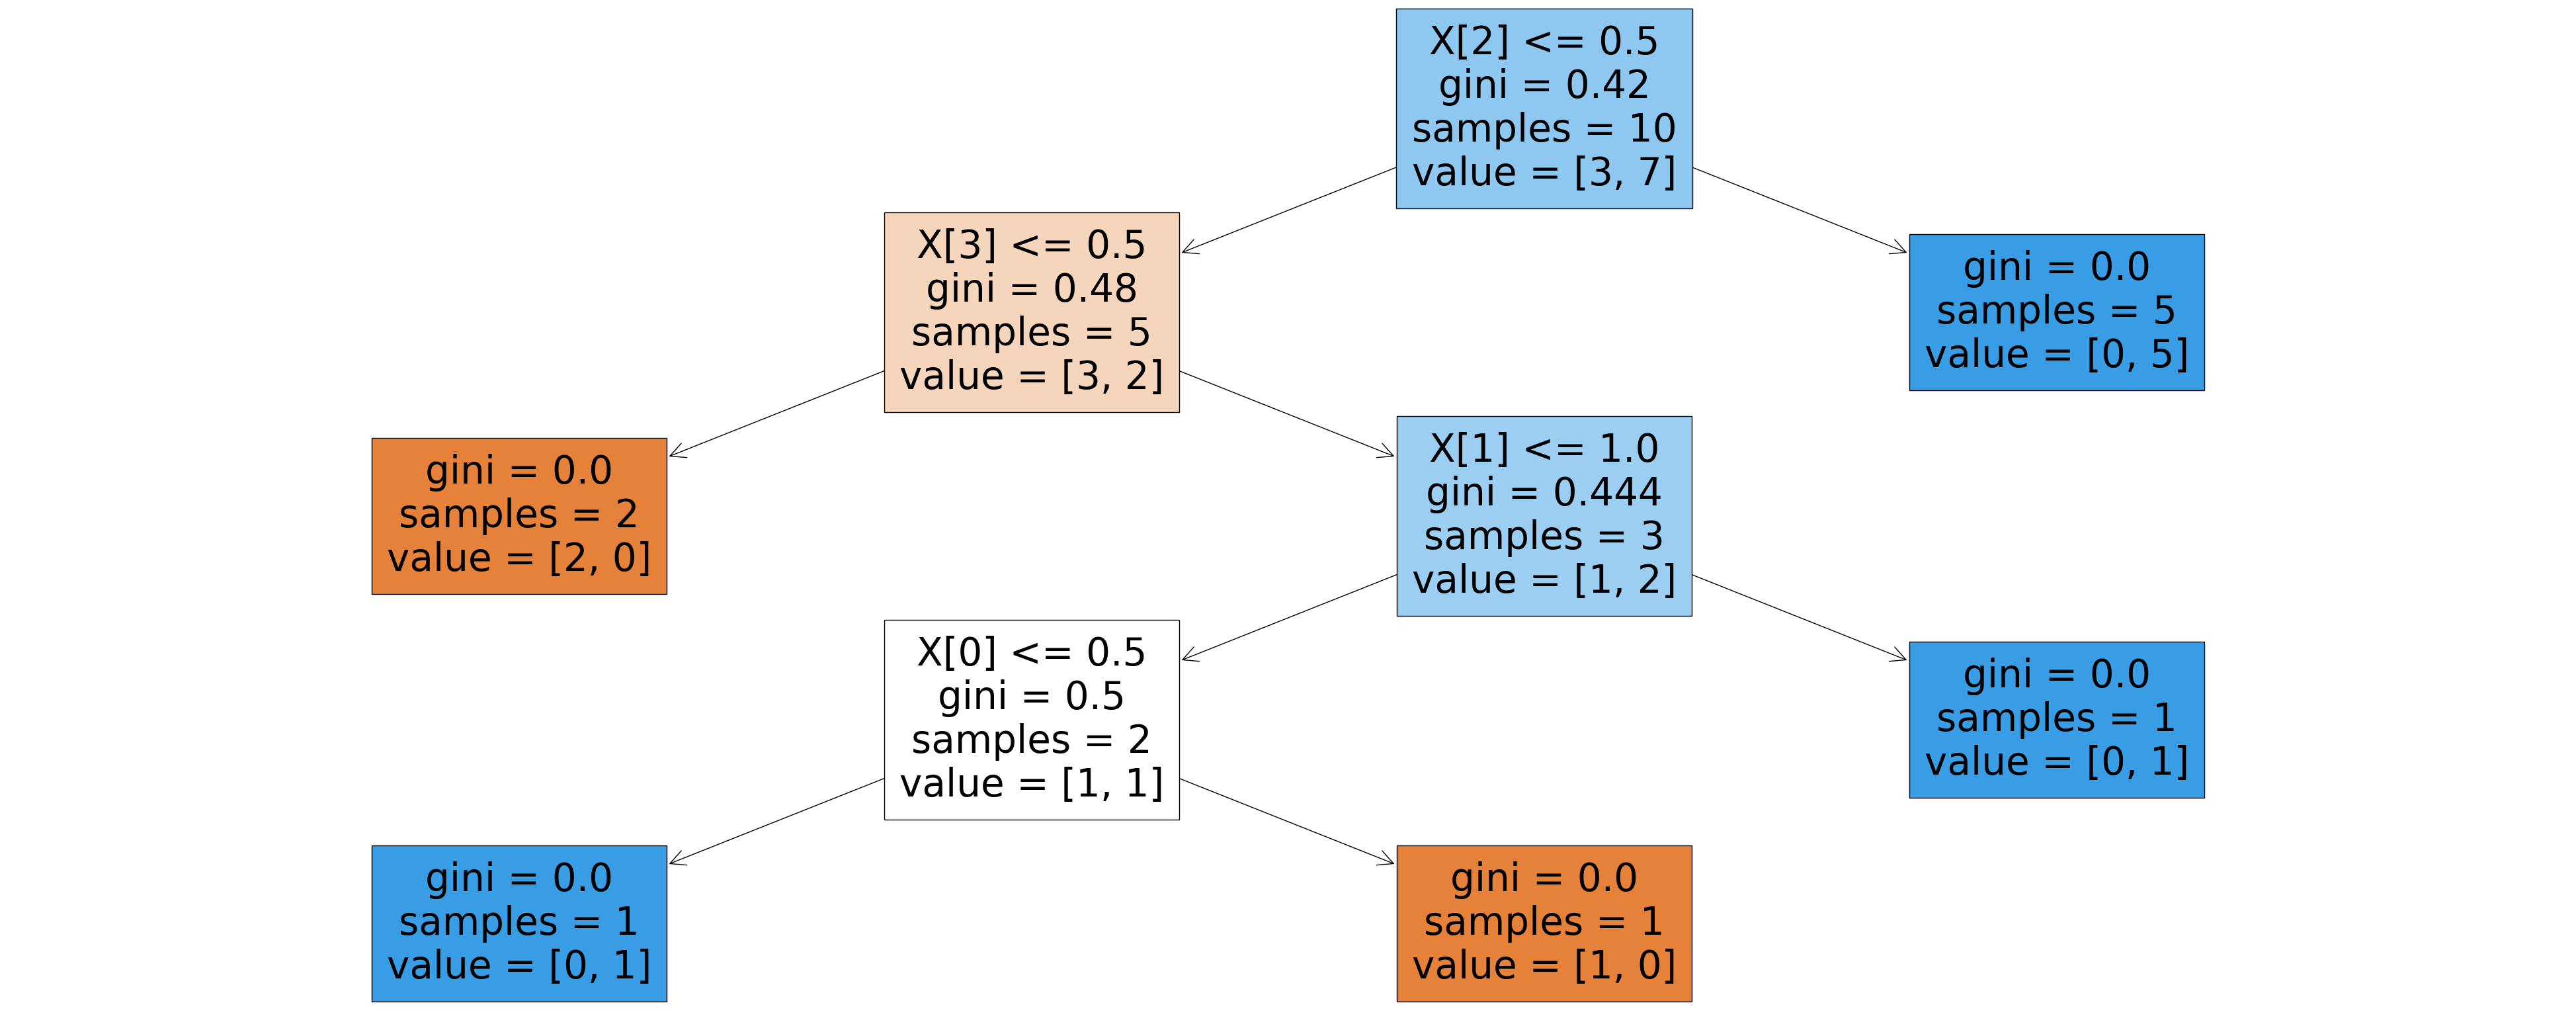

In [11]:
#decision tree classifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(50,20))
plot_tree(model, filled=True)
plt.show()

In [12]:
df = pd.read_excel('embeddingsdata.xlsx')
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,2
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,0
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,2
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,5


In [13]:
x = df.iloc[:,0:768]
y = df.iloc[:,768]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [15]:
x_train

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
20,0.015770,-0.039677,0.022405,0.045627,0.002147,0.019411,-0.073581,0.038426,0.041445,-0.040165,...,-0.045809,-0.016347,-0.029518,-0.057829,0.016488,0.040557,0.021166,0.013259,-0.002913,-0.019672
532,0.023218,-0.035069,0.044881,0.029791,-0.001557,0.009048,-0.065849,0.041826,0.028406,-0.029564,...,-0.028317,0.009085,-0.015309,-0.029680,0.009036,0.043287,0.028426,0.011757,-0.014840,-0.013300
622,0.013412,-0.005632,0.022147,0.070511,-0.030932,0.011188,-0.048425,0.029029,0.036266,-0.016750,...,-0.008664,0.008042,-0.024284,-0.031343,0.037208,0.035524,0.009839,-0.003875,-0.020651,-0.045277
342,0.005784,-0.032630,0.016748,0.050207,0.016599,0.016654,-0.064409,0.033645,0.035255,-0.000392,...,-0.026493,0.016247,-0.008604,-0.053151,0.024819,0.043665,0.013333,0.004693,-0.027752,-0.025644
223,0.025599,-0.032406,0.011476,0.055867,0.008876,0.021130,-0.060213,0.037218,0.049196,-0.021832,...,-0.029810,-0.003513,-0.020599,-0.066645,0.024584,0.034432,0.016193,0.016395,-0.026217,-0.018821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.005464,-0.018652,0.019880,0.044390,0.017531,0.015683,-0.059361,0.051798,0.059731,-0.016047,...,-0.029399,-0.008130,-0.023517,-0.058815,0.028970,0.020314,0.023938,0.022544,-0.022084,-0.006898
226,0.008090,-0.005840,0.023437,0.045740,0.009618,0.009077,-0.062142,0.040692,0.046721,-0.023389,...,-0.022091,-0.010422,-0.015009,-0.068890,0.016603,0.039444,0.024850,0.017035,-0.016488,-0.023612
776,0.029414,-0.037861,0.017277,0.044875,0.004904,0.015530,-0.056729,0.024172,0.037832,-0.028651,...,-0.049889,0.008468,-0.013717,-0.068106,0.027560,0.035395,0.020359,-0.013530,-0.012556,-0.033185
134,0.005618,-0.041801,0.022094,0.031443,0.013687,0.003732,-0.053927,0.018573,0.039377,-0.032702,...,-0.024158,0.020163,-0.024684,-0.051487,0.029550,0.057533,0.026014,-0.000323,-0.026694,-0.031420


In [16]:
#default decision tree classifier accuracies
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pro_model = DecisionTreeClassifier()
pro_model = pro_model.fit(x_train,y_train)
train_pred = pro_model.predict(x_train)
test_pred = pro_model.predict(x_test)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(train_accuracy)
print(test_accuracy)

1.0
0.38666666666666666


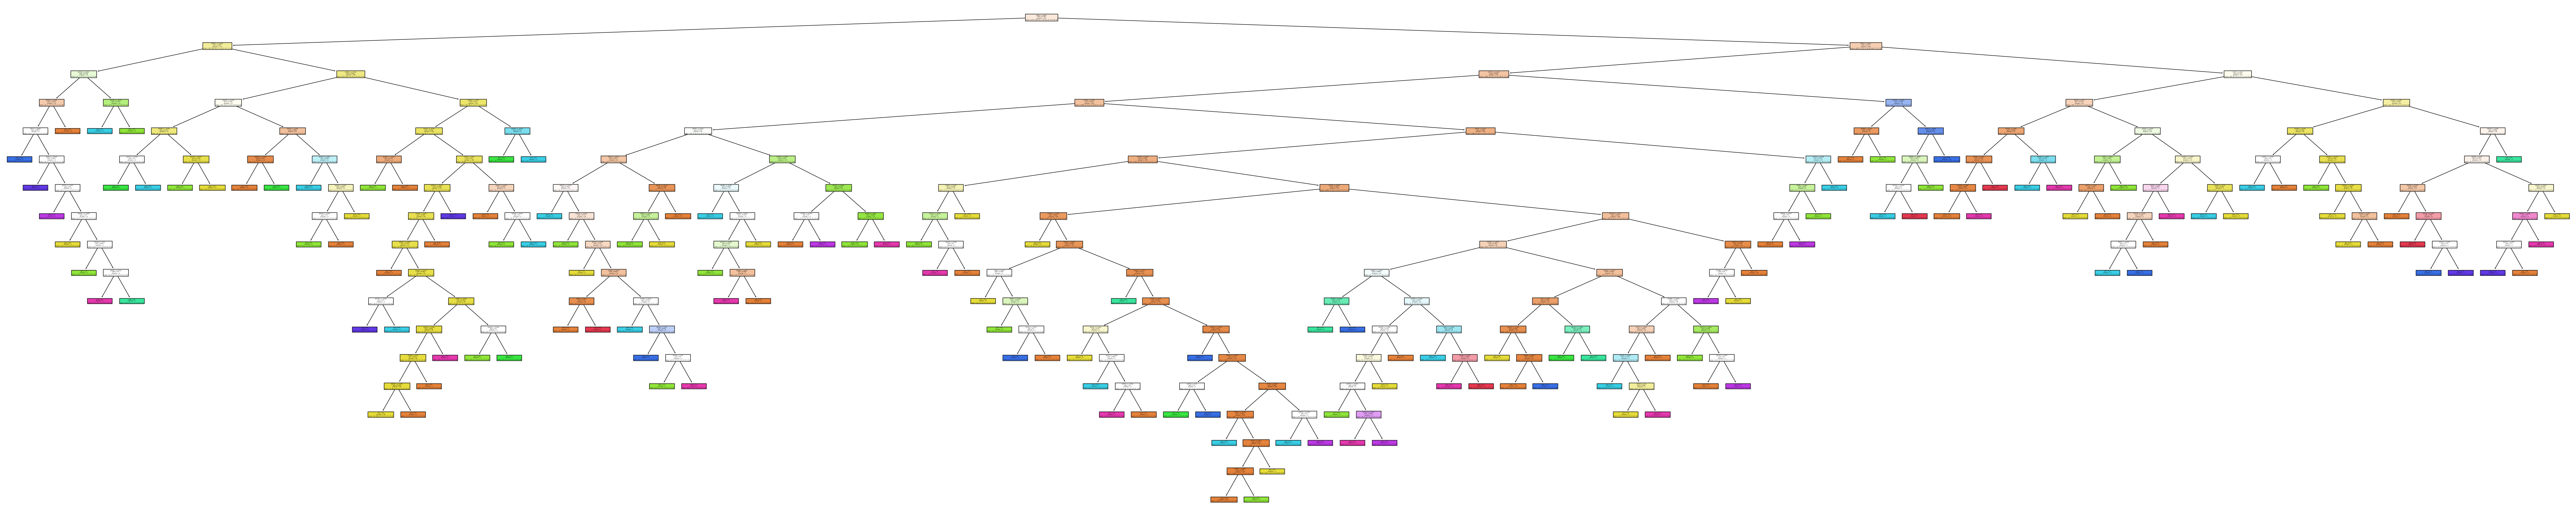

In [17]:
#default decision tree classifier 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(100, 20))
tree.plot_tree(pro_model, filled=True)
plt.show()

In [18]:
#decision tree classifier of depth = 5 
pro_model = DecisionTreeClassifier(max_depth=5)
pro_model = pro_model.fit(x_train,y_train)
train_pred = pro_model.predict(x_train)
test_pred = pro_model.predict(x_test)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(train_accuracy)
print(test_accuracy)

0.7111111111111111
0.49777777777777776


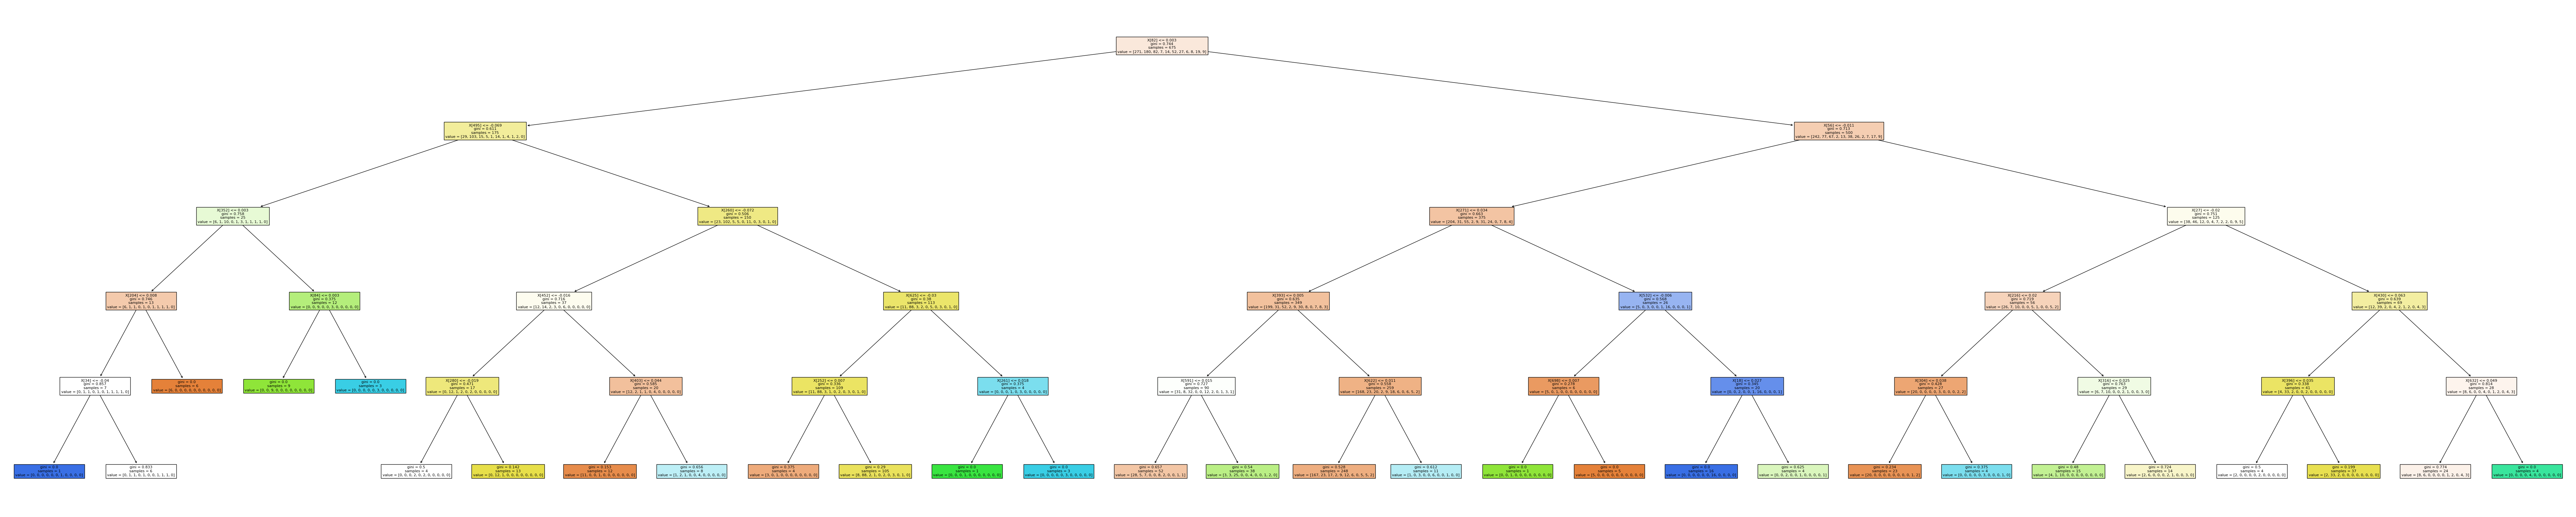

In [19]:
plt.figure(figsize=(100, 20))
tree.plot_tree(pro_model, filled=True)
plt.show()

In [20]:
#decision tree classifier with entropy as criterion 
pro_model = DecisionTreeClassifier(criterion="entropy")
pro_model = pro_model.fit(x_train,y_train)
train_pred = pro_model.predict(x_train)
test_pred = pro_model.predict(x_test)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(train_accuracy)
print(test_accuracy)

1.0
0.41333333333333333


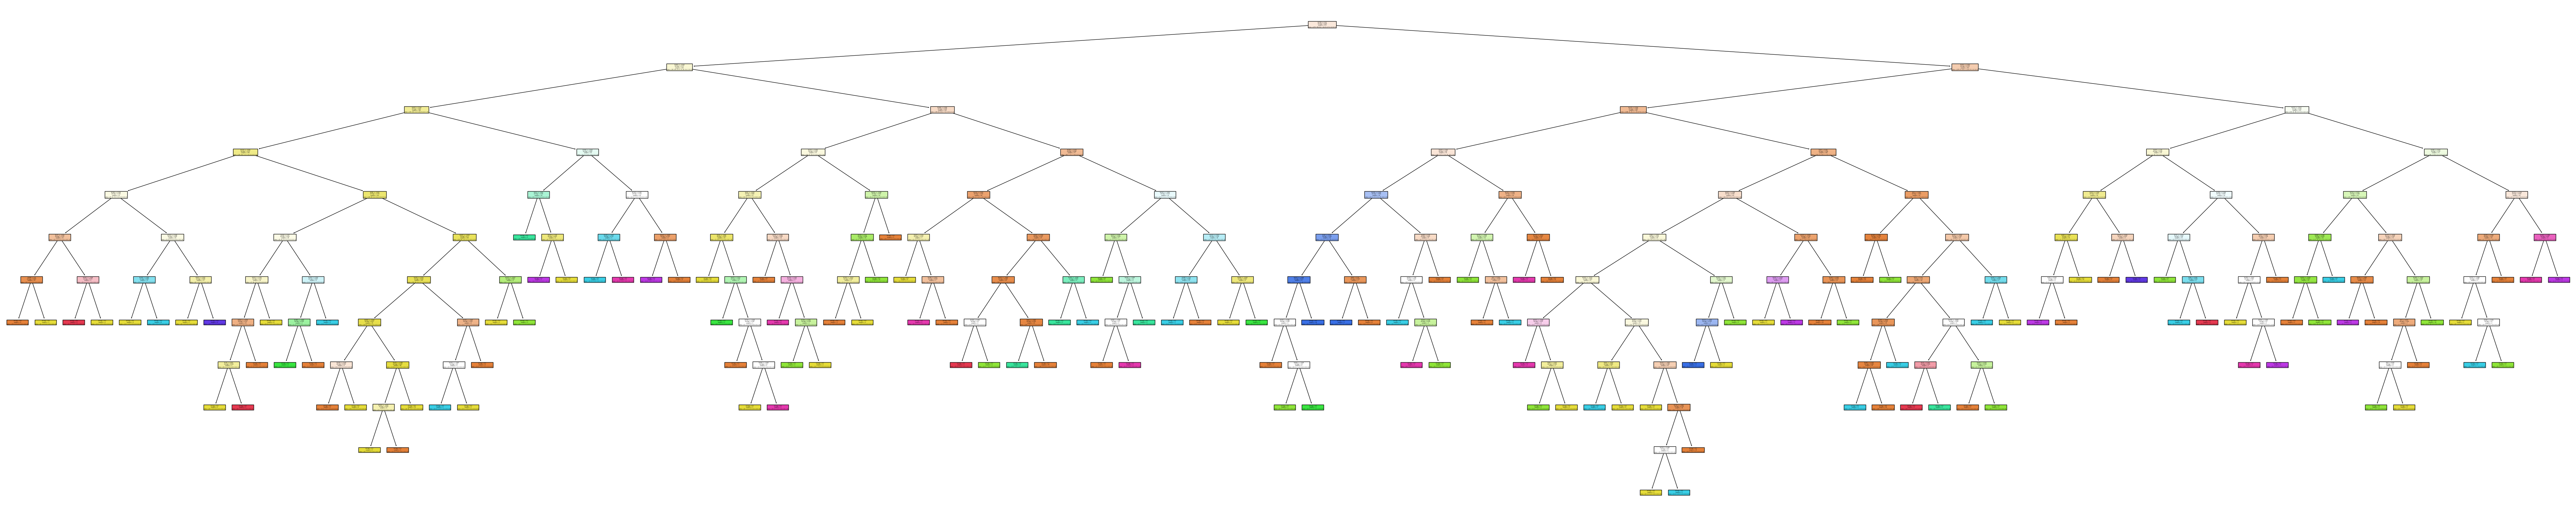

In [21]:
plt.figure(figsize=(100, 20))
tree.plot_tree(pro_model, filled=True)
plt.show()

In [24]:
#randomforest classifier
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier()
randomforest_model.fit(x_train, y_train)
rf_pred_tr = randomforest_model.predict(x_train)
rf_pred_te = randomforest_model.predict(x_test)
rf_accuracy_tr = accuracy_score(y_train, rf_pred_tr)
rf_accuracy_te = accuracy_score(y_test, rf_pred_te)
print(rf_accuracy_tr)
print(rf_accuracy_te)

1.0
0.6222222222222222


In [26]:
#precision of random forest classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rf_precision_tr = precision_score(y_train, rf_pred_tr,average='micro')
rf_precision_te = precision_score(y_test, rf_pred_te,average='micro')
print(rf_precision_tr)
print(rf_precision_te)

1.0
0.6222222222222222


In [30]:
#recall of random forest classifier
rf_recall_tr = recall_score(y_train, rf_pred_tr,average='micro')
rf_recall_te = recall_score(y_test, rf_pred_te,average='micro')
print(rf_recall_tr)
print(rf_recall_te)

1.0
0.6222222222222222


In [31]:
#f1 score of random forest classifier
rf_f1_score_tr = f1_score(y_train, rf_pred_tr,average='micro')
rf_f1_score_te = f1_score(y_test, rf_pred_te,average='micro')
print(rf_f1_score_tr)
print(rf_f1_score_te)

1.0
0.6222222222222222


In [33]:
#recall of decisiontree classifier
pro_recall_tr = recall_score(y_train, train_pred,average='micro')
pro_recall_te = recall_score(y_test, test_pred,average='micro')
print(pro_recall_tr)
print(pro_recall_te)

1.0
0.41333333333333333


In [34]:
#precision of decisiontree classifier
pro_precision_tr = precision_score(y_train, train_pred,average='micro')
pro_precision_te = precision_score(y_test, test_pred,average='micro')
print(pro_precision_tr)
print(pro_precision_te)

1.0
0.41333333333333333


In [35]:
#f1score of decisiontree classifier
pro_f1_tr = f1_score(y_train, train_pred,average='micro')
pro_f1_te = f1_score(y_test, test_pred,average='micro')
print(pro_f1_tr)
print(pro_f1_te)

1.0
0.41333333333333333
